In [4]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('data.csv')
print(df.to_string())

     Send Time Send message Received Time Received message
0    47:48.940         1:Hi     47:49.462             1:Hi
1    47:49.000         2:Hi     47:49.523             2:Hi
2    47:49.660         3:Hi     47:49.719             3:Hi
3    47:49.862         4:Hi     47:49.917             4:Hi
4    47:50.062         5:Hi     47:50.119             5:Hi
5    47:50.264         6:Hi     47:50.329             6:Hi
6    47:50.464         7:Hi     47:50.526             7:Hi
7    47:50.665         8:Hi     47:50.728             8:Hi
8    47:50.870         9:Hi     47:50.931             9:Hi
9    47:51.070        10:Hi     47:51.126            10:Hi
10   47:51.276        11:Hi     47:51.329            11:Hi
11   47:51.479        12:Hi     47:51.535            12:Hi
12   47:51.680        13:Hi     47:51.733            13:Hi
13   47:51.882        14:Hi     47:51.938            14:Hi
14   47:52.088        15:Hi     47:52.144            15:Hi
15   47:52.287        16:Hi     47:52.344            16:

Average Delay = 63.00500000000559 ms
Max Delay = 523.0000000001382 ms
Min Delay = 51.99999999967986 ms
Median Delay = 57.999999999992724 ms


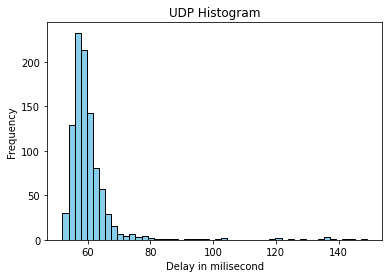

In [12]:
def time_to_seconds(time_str):
    
    minutes, seconds = map(float, time_str.split(':'))
    total_seconds = minutes * 60 + seconds
    return total_seconds

delay = 0
delay_array=[]
for id, row in df.iterrows():
    if (row["Send message"]==row["Received message"]):
        send = time_to_seconds(row["Send Time"])
        receive = time_to_seconds(row["Received Time"])
        #print(receive-send)
        delay_array.append((receive-send)*1000)
        delay = delay+(receive-send)*1000
print("Average Delay =",delay/1000,"ms")
print("Max Delay =", max(delay_array),"ms")
print("Min Delay =", min(delay_array),"ms")
print("Median Delay =", np.median(delay_array),"ms")
#print(np.mean(delay_array))

delay_array = [x for x in delay_array if x<=150]
plt.xlabel('Delay in milisecond')
plt.ylabel('Frequency')
plt.title('UDP Histogram')
plt.hist(delay_array, bins=50, color='skyblue', edgecolor='black')
plt.show()